<a href="https://colab.research.google.com/github/ChiboromaW/SGA1_4/blob/main/Mini_Project_Copy_of_Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name:Chiboroma Worlu

<br>

## Please show and display ALL your calculations and results.


In [176]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import spacy




# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black
#%load_ext autoreload
#%autoreload 2

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [177]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is just defined to load data
    
    Paramaters;
        filename (str): the filepath
        sep (str, default = ","): separators could also be ',', '\t', e.t.c
        
    Returns:
        data (pd.DataFrame): this is the loaded dataframe
    """
    
    data =pd.read_csv(filename)
    print(f"shape of data: {data.shape}\n")
    return data

In [178]:
fp = "Ulta Skincare Reviews.csv.zip"
df = load_data(filename=fp)

df.head()

shape of data: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [179]:
df.describe()

,Review_Upvotes,Review_Downvotes
count,4150.000000,4150.000000
mean,0.591325,0.161205
std,2.210041,0.912561
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,84.000000,35.000000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


In [181]:
#checking for null values
df.isnull().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [182]:
df[df["Review_Text"].isna()]


,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
3684,Received a sample and loved it!,NaN,Yes,4 years ago,"Columbia, SC",0,0,Daily Microfoliant,Dermalogica,3/27/23
3686,This product works,NaN,Yes,4 years ago,"Columbia, SC",0,0,Daily Microfoliant,Dermalogica,3/27/23


In [183]:
#To get rid of the missing values
df.dropna(inplace=True)
df.isnull().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

In [184]:
# Split the data into numeric and categorical data
num_col = [(df.select_dtypes(include = np.number).columns)]
cat_col = [(df.select_dtypes(include = object).columns)]

In [185]:
cat_col = df.select_dtypes(include= object)
cat_col.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [186]:
num_col = df.select_dtypes(include= np.number)
num_col.head()

,Review_Upvotes,Review_Downvotes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


**To Get The Unique Values From The Data and Their Value Counts**

In [187]:
df['Product'].value_counts()

Daily Superfoliant             1500
Daily Microfoliant             1497
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64

In [188]:
df['Brand'].value_counts()

Dermalogica    4147
Name: Brand, dtype: int64

In [189]:
df['Review_Title'].value_counts()

Amazing product                    95
Love this mask                     90
It's hydrating                     89
Would absolutely buy this again    89
Buy it!                            89
                                   ..
Very Delicate &amp; Effective       1
I was supposed to get               1
Love this cleanser. Leaves my       1
Nice and soothing for winter        1
This is the best!!!                 1
Name: Review_Title, Length: 2825, dtype: int64

In [190]:
df['Verified_Buyer'].value_counts()

No     2900
Yes    1247
Name: Verified_Buyer, dtype: int64

In [191]:
df["Verified_Buyer"] = np.where(df["Verified_Buyer"] == "Yes",1,0)
df.head(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,0,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,0,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [192]:
df['Review_Location'].value_counts()

Undisclosed        909
Los Angeles        117
Iowa                93
Richmond Va         89
Orlando, Fl         89
                  ... 
Devon                1
Southend-On-Sea      1
United Kingdom       1
Leicester            1
Fayetteville         1
Name: Review_Location, Length: 1423, dtype: int64

In [193]:
df["Review_Date"].unique()

array(['15 days ago', '27 days ago', '2 months ago', '3 months ago',
       '4 months ago', '5 months ago', '6 months ago', '7 months ago',
       '8 months ago', '9 months ago', '10 months ago', '11 months ago',
       '1 year ago', '2 years ago', '3 years ago', '4 years ago',
       '5 years ago', '6 years ago', '7 years ago', '8 years ago',
       '9 years ago', '10 years ago', '11 years ago', '1 month ago',
       '7 days ago', '16 days ago', '17 days ago', '18 days ago',
       '19 days ago', '20 days ago', '22 days ago', '23 days ago',
       '25 days ago', '28 days ago', '29 days ago', '4 days ago',
       '5 days ago', '12 days ago', '14 days ago', '21 days ago',
       '24 days ago'], dtype=object)

In [194]:
# Arranging into date groups

date_groups = {
    r"(\d*\W+days ago)": "< 1 month",
    r"(\d{1,2}\s+months? ago)": "< 1 year",
    r"([2-5]\s+years ago|[1]\s+year ago)": "1 - 5 years",
    r"([6-9]\s+years ago|\d{2}\s+years ago)": "> 5 years",
}


for pattern, replacement in date_groups.items():
    df["Review_Date"] = df["Review_Date"].str.replace(pattern, replacement, regex=True)


**Visual Representation of the Data and Reviews**

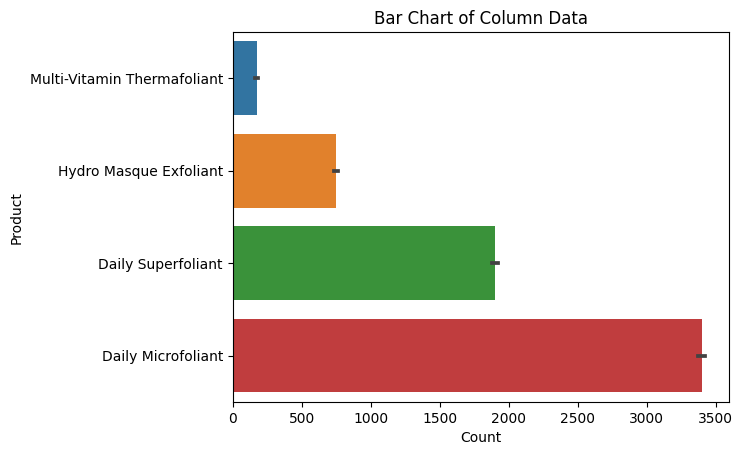

In [195]:
# Extract the data from the column
product_data = df['Product']

# Plot a bar chart using Seaborn
sns.barplot(x=product_data.index, y=product_data.values)

# Set the x-axis label
plt.xlabel('Count')

# Set the y-axis label
plt.ylabel('Product')

# Set the title of the chart
plt.title('Bar Chart of Column Data')

# Show the plot
plt.show()

In [196]:
# loading in the language model pipeline from spacy
import spacy

nlp = spacy.load("en_core_web_sm")

In [197]:
# Load libraries
import unicodedata
import sys

def clean_text(df:pd.DataFrame, col:str)->None:
    ''' cleaning text'''

    #stopwords
    stopwords = nlp.Defaults.stop_words
    pat = r'\b(?:ive|im|{})\b'.format('|'.join(stopwords))

    # Create a dictionary of punctuation characters
    punctuation = dict.fromkeys(i for i in range(sys.maxunicode)
     if unicodedata.category(chr(i)).startswith('P'))

    # For each string, remove any punctuation characters and stopwords
    df[col]=df[col].str.lower().str.translate(punctuation) 
    df[col]= df[col].str.replace(pat, '', regex=True)

    #remove emojis
    def deEmojify(inputString):
        return inputString.encode('ascii', 'ignore').decode('ascii')
    df[col]=df[col].apply(deEmojify)

In [198]:
clean_text(df,'Review_Text')
clean_text(df,'Review_Title')

# creating text variable
review_text=' '.join(df['Review_Text'])

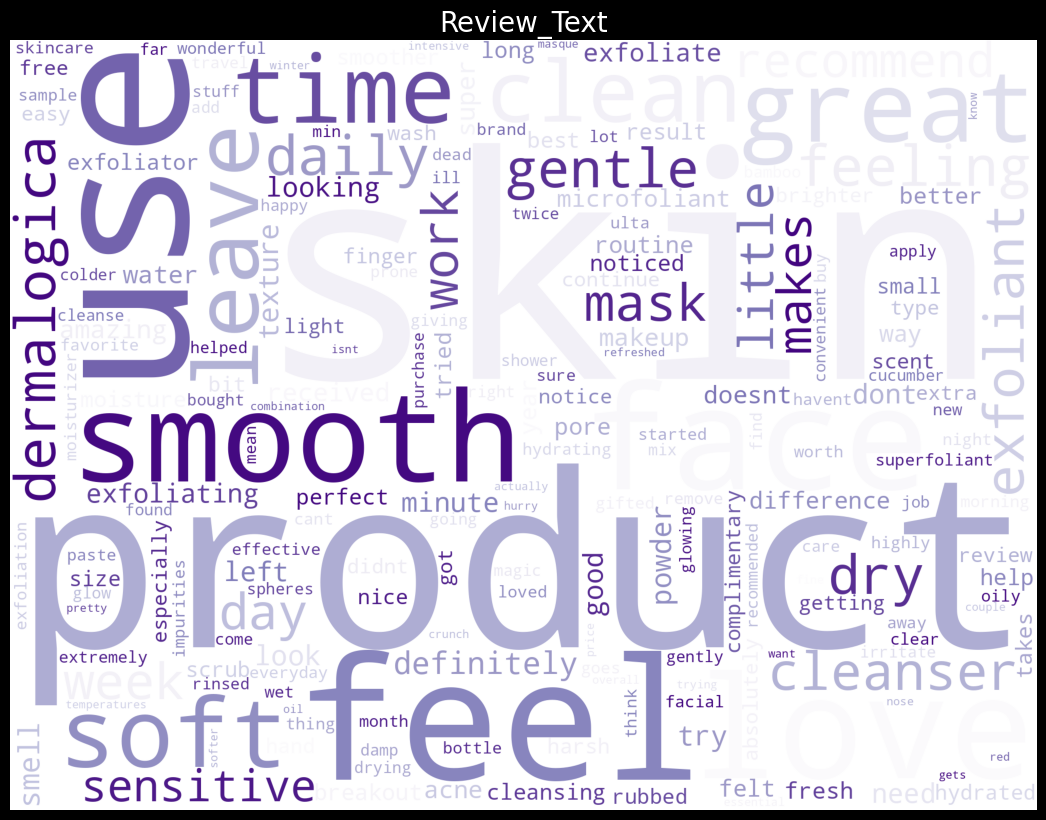

In [199]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap


plt.figure(figsize=(20,10),facecolor='k')

# generate word cloud
word_cloud = WordCloud(
    width = 2000,
    height = 1500,
    random_state = 1,
    background_color = "white",
    colormap = "Purples",
    collocations = False
    
).generate(review_text)

# display the generated wordCloud
plt.imshow(word_cloud)
plt.axis("off")
plt.title('Review_Text',color='white', fontsize=20)
plt.show()

**What can the reviews tell us about the products?**

**ANSWER**: A higher percent of the reviews were positive with good comments. This implies that the product is a good one and excellent for use.

**Do most buyers have common skincare issues?**

**ANSWER**: From the review, we can say that most buyers have a similar skincare issue, as the products are designed to help acne, sensitive skin, and dry skin. Hence most buyers have a common skincare issue that makes them patronize this brand. 

**What issues did the products help solve or exacerbate?**

**ANSWER**: The product is designed to exfoliate and cleanse the skin

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

In [200]:
df['Product'].value_counts()

Daily Superfoliant             1500
Daily Microfoliant             1497
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64

In [201]:
Superfoliant=df[df['Product']=='Daily Superfoliant']
Microfoliant=df[df['Product']=='Daily Microfoliant']
Exfoliant=df[df['Product']=='Hydro Masque Exfoliant']
Thermafoliant=df[df['Product']=='Multi-Vitamin Thermafoliant']


**Word Cloud For Daily Superfoliant Product**

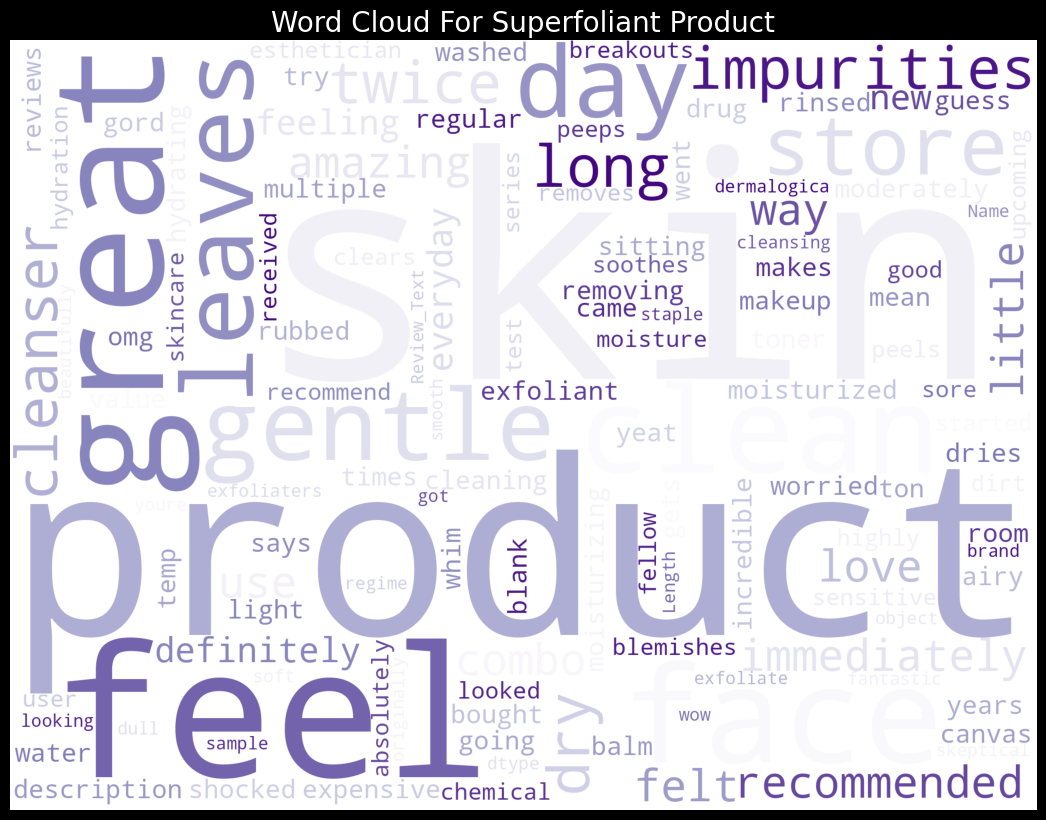

In [202]:
plt.figure(figsize=(16,10),facecolor='k')

word_cloud = WordCloud(
    width = 2000,
    height = 1500,
    random_state = 1,
    background_color = "white",
    colormap = "Purples",
    collocations = False
    
).generate(str(Superfoliant['Review_Text']))

# display the generated wordCloud
plt.imshow(word_cloud)
plt.axis("off")
plt.title('Word Cloud For Superfoliant Product',color='white', fontsize=20)
plt.show()

**Word Cloud For Daily Microfoliant Product**

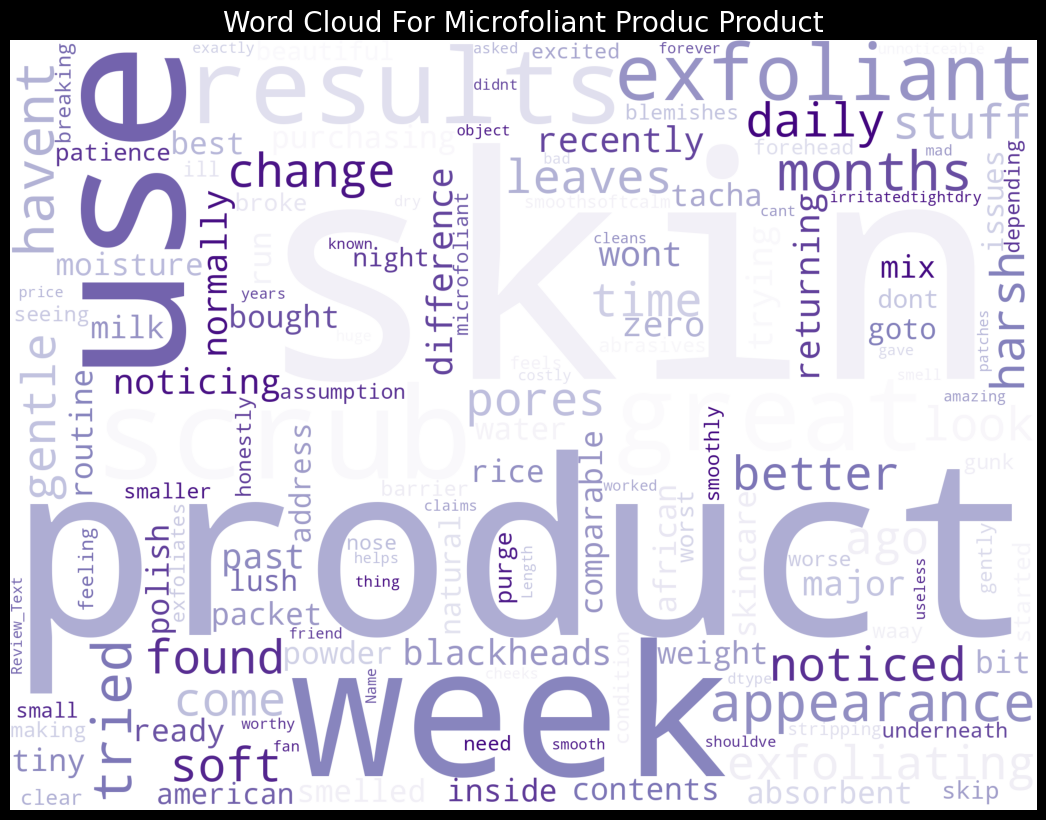

In [203]:
plt.figure(figsize=(16,10),facecolor='k')

word_cloud = WordCloud(
    width = 2000,
    height = 1500,
    random_state = 1,
    background_color = "white",
    colormap = "Purples",
    collocations = False
    
).generate(str(Microfoliant['Review_Text']))

# display the generated wordCloud
plt.imshow(word_cloud)
plt.axis("off")
plt.title('Word Cloud For Microfoliant Produc Product',color='white', fontsize=20)
plt.show()

**Word Cloud For Hydro Masque Exfoliant Product**

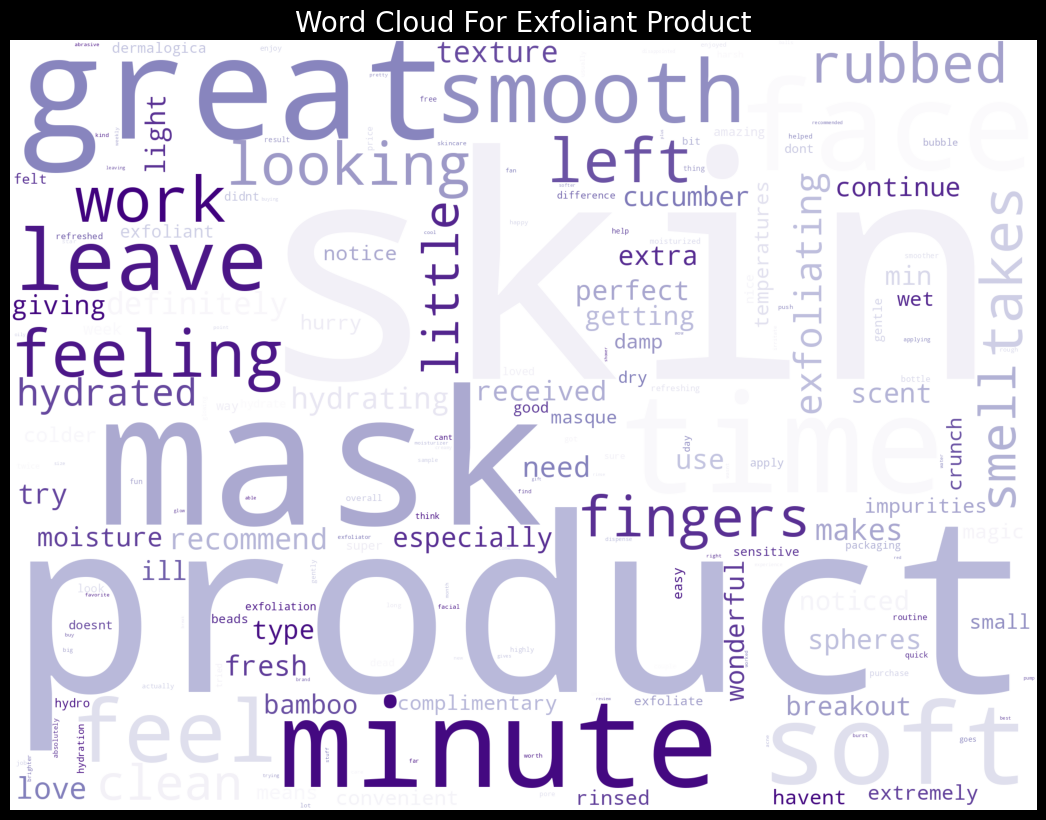

In [204]:
plt.figure(figsize=(16,10),facecolor='k')

word_cloud = WordCloud(
    width = 2000,
    height = 1500,
    random_state = 1,
    background_color = "white",
    colormap = "Purples",
    collocations = False
    
).generate(str(Exfoliant['Review_Text']))

# display the generated wordCloud
plt.imshow(word_cloud)
plt.axis("off")
plt.title('Word Cloud For Exfoliant Product',color='white', fontsize=20)
plt.show()

**Word Cloud For Multi-Vitamin Thermafoliant Product**

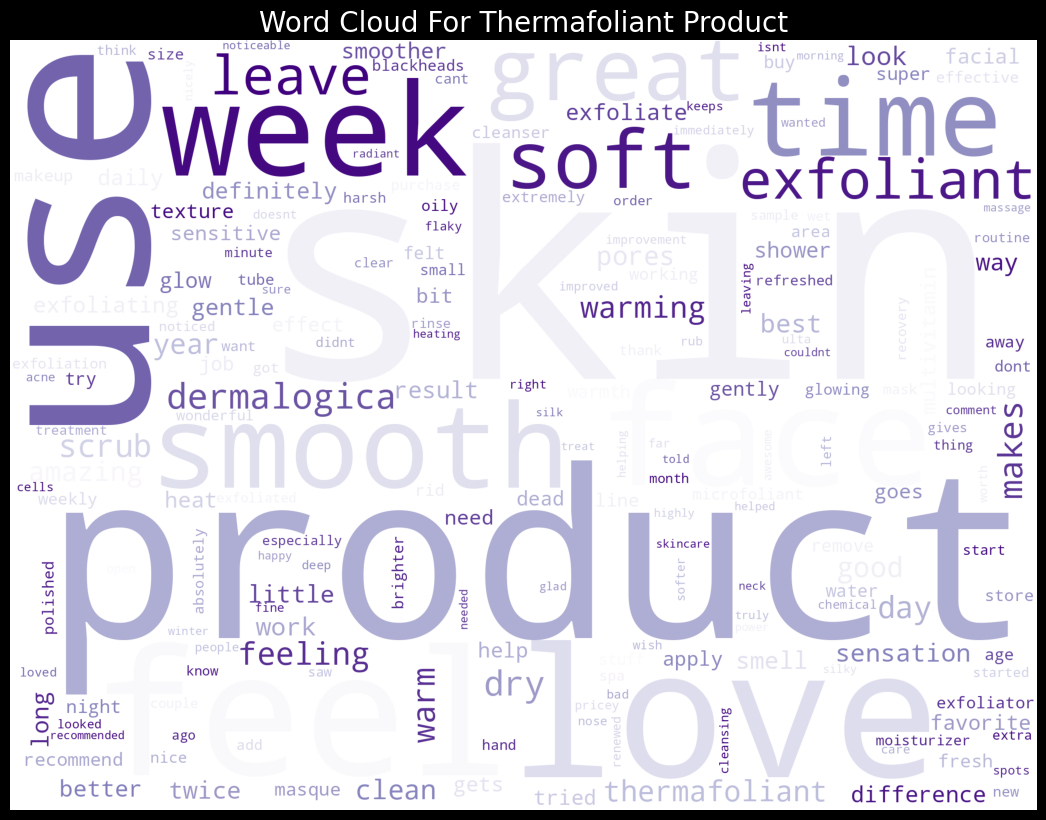

In [205]:
plt.figure(figsize=(16,10),facecolor='k')

word_cloud = WordCloud(
    width = 2000,
    height = 1500,
    random_state = 1,
    background_color = "white",
    colormap = "Purples",
    collocations = False
    
).generate(str(Thermafoliant['Review_Text']))

# display the generated wordCloud
plt.imshow(word_cloud)
plt.axis("off")
plt.title('Word Cloud For Thermafoliant Product',color='white', fontsize=20)
plt.show()

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

**Performing Sentiment Analysis Using TextBlob**

In [206]:
import pandas as pd
from textblob import TextBlob

In [207]:
df['Sentiment'] = df['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

df.head(2)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Sentiment
0,perfect,love face shower heats gives light scrub nicely,0,< 1 month,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.5
1,need,better daily microfoliant obsessed skin smoother,0,< 1 month,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.0


In [208]:
#To get the negative reviews
df[df['Sentiment']== -1].head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Sentiment
1743,breathe product comes bottle,powder mix water paste apply skin shake bottle gets air breathe coughed minutes getting bottle smells terrible use,0,1 - 5 years,Wyoming,4,11,Daily Superfoliant,Dermalogica,3/27/23,-1.0
1929,smell,smells horrific wont repurchase,0,1 - 5 years,Chicago,0,2,Daily Superfoliant,Dermalogica,3/27/23,-1.0
3467,smell awful,smells like porta potty awful,0,1 - 5 years,Fargo,0,1,Daily Microfoliant,Dermalogica,3/27/23,-1.0


In [209]:
#To get the positive reviews
df[df['Sentiment']== 1].head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Sentiment
74,best exfoliant,best found,1,< 1 year,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,1.0
112,highly recommended,dermalogicas best products,0,1 - 5 years,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,1.0
132,best,awesome product recommend,1,1 - 5 years,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,1.0
135,awesome,awesome,1,1 - 5 years,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,1.0
143,product like,product like microdermabrasion treatment use shower scrub neck night serum works perfectly scrub drying dont apply moisturizer,1,1 - 5 years,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,1.0


In [210]:
#To get the nuetral reviews
df[df['Sentiment']== 0].head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,Sentiment
1,need,better daily microfoliant obsessed skin smoother,0,< 1 month,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.0
9,excelent,excelent,0,< 1 year,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.0
18,great product,product 5 years like alot scub works welland skin feels like silk afer use,0,< 1 year,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.0
21,love,feel product start work minute hits skin,0,< 1 year,Undisclosed,0,1,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.0
32,noticeable difference,tel noticeable difference skins texture week,0,< 1 year,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,0.0


In [211]:
#To calculate sentiment polarity and subjectivity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Applying the sentiment analysis function to each review in the DataFrame
df['polarity'], df['subjectivity'] = zip(*df['Review_Text'].apply(get_sentiment))

# Print the average sentiment polarity and subjectivity for the dataset
print('Average polarity:', df['polarity'].mean())
print('Average subjectivity:', df['subjectivity'].mean())

# Print the DataFrame with the sentiment scores for each review
print(df[['Review_Text', 'polarity', 'subjectivity']])

Average polarity: 0.27474053063842646
Average subjectivity: 0.5741106245000444
                                                                                                                                                                                                                                                                                                                                                                                                                                         Review_Text  \
0                                                                                                                                                                                                                                                                                                                                                                                          love     face    shower heats   gives  light scrub nicely   
1                                        

**Building Model**

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [213]:
vars_to_drop = ["Brand", "Scrape_Date", "Review_Location"]
df.drop(columns=vars_to_drop, inplace=True)

df.shape
df.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Upvotes,Review_Downvotes,Product,Sentiment,polarity,subjectivity
0,perfect,love face shower heats gives light scrub nicely,0,< 1 month,0,0,Multi-Vitamin Thermafoliant,0.5,0.5,0.766667
1,need,better daily microfoliant obsessed skin smoother,0,< 1 month,0,0,Multi-Vitamin Thermafoliant,0.0,0.0,0.500000
2,clean skin,enjoy product look forward feels great,0,< 1 year,0,0,Multi-Vitamin Thermafoliant,0.6,0.6,0.625000


In [214]:
vars_to_drop = ["Review_Title", "Review_Text"]
df.drop(columns=vars_to_drop, inplace=True)

df.shape
df.head(3)

,Verified_Buyer,Review_Date,Review_Upvotes,Review_Downvotes,Product,Sentiment,polarity,subjectivity
0,0,< 1 month,0,0,Multi-Vitamin Thermafoliant,0.5,0.5,0.766667
1,0,< 1 month,0,0,Multi-Vitamin Thermafoliant,0.0,0.0,0.500000
2,0,< 1 year,0,0,Multi-Vitamin Thermafoliant,0.6,0.6,0.625000


In [215]:
TESTSIZE = 0.2
RANDOMSTATE = 100
TARGET = "Sentiment"

# Independent variable (matrix)
X = df.drop(columns=TARGET)

# Target variable (Vector)
y = df[TARGET]


# Split data X & y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TESTSIZE, random_state=RANDOMSTATE)

#Shape: Train, Test
print(f"'Independent feature':{X_train.shape}, {X_test.shape}, \n'Target features:' {y_train.shape}, {y_test.shape}") 

'Independent feature':(3317, 7), (830, 7), 
'Target features:' (3317,), (830,)


In [216]:
# Scaling and encoding the data variables

# Selecting columns to perform preprocessing on
vars_to_encode = ["Review_Date", "Product", "Verified_Buyer"]
vars_to_scale = ["Review_Upvotes", "Review_Downvotes"]

# Applying ordinal encoder
OE = OrdinalEncoder(dtype=int, handle_unknown="error")

# Scale
scaler = MinMaxScaler()

col_transformer = ColumnTransformer(
    transformers=[("OE", OE, vars_to_encode), ("scaler", scaler, vars_to_scale)],
    remainder="passthrough",
)

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OE', OrdinalEncoder(dtype=<class 'int'>),
                                 ['Review_Date', 'Product', 'Verified_Buyer']),
                                ('scaler', MinMaxScaler(),
                                 ['Review_Upvotes', 'Review_Downvotes'])])

In [217]:
transformed = col_transformer.fit_transform(X_train)

transformed_data =pd.DataFrame(transformed, columns=col_transformer.get_feature_names_out())
transformed_data.head()

,OE__Review_Date,OE__Product,OE__Verified_Buyer,scaler__Review_Upvotes,scaler__Review_Downvotes,remainder__polarity,remainder__subjectivity
0,0.0,1.0,0.0,0.0,0.0,0.220536,0.660714
1,0.0,1.0,1.0,0.0,0.0,0.159091,0.655303
2,0.0,0.0,0.0,0.0,0.0,0.220000,0.680000
3,2.0,1.0,0.0,0.0,0.0,0.377778,0.733333
4,0.0,0.0,1.0,0.0,0.0,0.146667,0.588333


**Training the model using Logistic Regression / Linear Regression**

In [223]:
from sklearn.linear_model import LinearRegression


In [225]:
# Initializing


linear = LinearRegression()

pipe_linear = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model =====
        ("linear", linear),
    ]
)

pipe_linear

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OE',
                                                  OrdinalEncoder(dtype=<class 'int'>),
                                                  ['Review_Date', 'Product',
                                                   'Verified_Buyer']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Review_Upvotes',
                                                   'Review_Downvotes'])])),
                ('linear', LinearRegression())])

In [228]:
# Define model
model = LinearRegression()

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[("col_transformer", col_transformer), ("model", model)])

# Preprocessing of training data, fit model
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_test)

In [ ]:
# Evaluating the model 
accuracy = metrics.accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average="macro")
recall = recall_score(y_test, preds, average="macro")
f1 = f1_score(y_test, preds, average="macro")
confusion = confusion_matrix(y_test, preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", confusion)

PS: Please I could not figure out how to fix this error. A similar error occured using Logistic Regression

**Using a confusion matrix for classification and to give a visual perfomance of the model**

In [ ]:
# Using a confusion matrix for classification matrix and to give a visual perfomance of the model

# Evaluate Model
labels = ["Negative", "Positive", "Neutral"]


conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_1)
conf_matrix

disp = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=labels)

# Display Confusion Matix
disp.plot(cmap=plt.cm.gray_r)
plt.title("Confusion Matrix", size=15)
plt.show()

In [ ]:
# Classification report

clf_report = metrics.classification_report(y_test, y_pred_1)

print(clf_report)